In [1]:
from pacti.contracts import PolyhedralIoContract
import numpy as np
import matplotlib.pyplot as plt

## CONSTANTS
a_i = 0.5
d_i = 1
a_ip = 10
d_ip = 1
a_j = 1
d_j = 1
a_jp = 10
d_jp = 1
kappa = 20
delta = 1
gamma = 0.05

# computed constants
b_i = a_i / d_i
b_ip = a_ip / d_ip
b_j = a_j / d_j
b_jp = a_jp / d_jp

# requirement values first scenario
A_i_H = 45
A_j_L = 0.02
m_i_H = 1
m_j_L = 0.00005
# requirement values second scenario
A_j_H = 90
A_i_L = 0.05
m_j_H = 0.25
m_i_L = 0.0001

In [2]:
assert A_j_L/m_j_L - A_i_H/m_i_H >= 0 
assert A_i_L/m_i_L - A_j_H/m_j_H >= 0

In [194]:
top_level_sc1 = PolyhedralIoContract.from_strings(
    input_vars=[],
    output_vars=["m_i", "m_j", "A_i", "A_j"],
    assumptions=[],
    guarantees=[f"m_i >= {m_i_H}", f"m_j <= {m_j_L}", f"A_i >= {A_i_H}", f"A_j <= {A_j_L}"]
)

monotonicity_component1_sc1 = PolyhedralIoContract.from_strings(
    input_vars=["p_i","p_j","q_i","q_j"],
    output_vars=["m_i"],
    assumptions=["q_i >= p_i"],
    guarantees=[f"{delta}*m_i >= {1/(1 + b_i*A_i_H + b_ip*A_j_L)}*p_i + {A_i_H*b_i/(1 + b_i*A_i_H + b_ip*A_j_L)}*q_i"]
)
# RHS above is >= m_i_H

monotonicity_component2_sc1 = PolyhedralIoContract.from_strings(
    input_vars=["p_i","p_j","q_i","q_j"],
    output_vars=["m_j"],
    assumptions=[f"{1 + b_jp*A_i_H} * q_j >= p_j"],
    guarantees=[f"{delta}*m_j <= {1/(1 + b_j*A_j_L + b_jp*A_i_H)}*p_j + {A_j_L*b_j/(1 + b_j*A_j_L + b_jp*A_i_H)}*q_j"]
)
# RHS above is <= m_j_L

A_definition_sc1 = PolyhedralIoContract.from_strings(
    input_vars=[],
    output_vars=["A_i", "A_j"],
    assumptions=[],
    guarantees=[
                f"{kappa * m_i_H} <= {gamma}*A_i",
                f"{gamma} * A_j <= {kappa * m_j_L}"]
)

# compute the parameters that yield the first set of top-level requirements
composed_contract1 = monotonicity_component1_sc1.compose(monotonicity_component2_sc1).compose(A_definition_sc1)
parameters_contract_1 = top_level_sc1.quotient(composed_contract1)


##################
## Now we analyze the second scenario: when m_i < m_i_L and m_j > m_J_H

top_level_sc2 = PolyhedralIoContract.from_strings(
    input_vars=[],
    output_vars=["m_i", "m_j", "A_i", "A_j"],
    assumptions=[],
    guarantees=[f"m_j >= {m_j_H}", f"m_i <= {m_i_L}", f"A_j >= {A_j_H}", f"A_i <= {A_i_L}"]
    )

monotonicity_component1_sc2 = PolyhedralIoContract.from_strings(
    input_vars=["p_i","p_j","q_i","q_j"],
    output_vars=["m_j"],
    assumptions=["q_j >= p_j"],
    guarantees=[f"{delta}*m_j >= {1/(1 + b_j*A_j_H + b_jp*A_i_L)}*p_j + {A_j_H*b_j/(1 + b_j*A_j_H + b_jp*A_i_L)}*q_j"]
)

monotonicity_component2_sc2 = PolyhedralIoContract.from_strings(
    input_vars=["p_i","p_j","q_i","q_j"],
    output_vars=["m_i"],
    assumptions=[f"{1 + b_ip*A_j_H} * q_i >= p_i"],
    guarantees=[f"{delta}*m_i <= {1/(1 + b_i*A_i_L + b_ip*A_j_H)}*p_i + {A_i_L*b_i/(1 + b_i*A_i_L + b_ip*A_j_H)}*q_i"]
)

A_definition_sc2 = PolyhedralIoContract.from_strings(
    input_vars=[],
    output_vars=["A_i", "A_j"],
    assumptions=[],
    guarantees=[f"{kappa * m_j_H} <= {gamma} * A_j",
                f"{gamma} * A_i <= {kappa * m_i_L}"]
)

# compute the parameters that yield the first set of top-level requirements
composed_contract2 = monotonicity_component1_sc2.compose(monotonicity_component2_sc2).compose(A_definition_sc2)
parameters_contract_2 = top_level_sc2.quotient(composed_contract2)

# report the parameter space that yields bistability
parameter_contract = parameters_contract_1.merge(parameters_contract_2)
print(parameter_contract)

InVars: []
OutVars:[p_i, p_j, q_i, q_j]
A: [
  
]
G: [
  -0.04219 p_i - 0.9494 q_i <= -1
  0.002217 p_j + 4.434e-05 q_j <= 5e-05
  -0.01093 p_j - 0.9836 q_j <= -0.25
  0.00111 p_i + 2.775e-05 q_i <= 0.0001
]


In [198]:
parameters_contract_1

<Var InVars: []
OutVars:[p_i, p_j, q_i, q_j]
A: [
  
]
G: [
  -0.04219 p_i - 0.9494 q_i <= -1
  0.002217 p_j + 4.434e-05 q_j <= 5e-05
  p_i - q_i <= 0
  p_j - 451 q_j <= 0
]>

In [197]:
parameters_contract_2

<Var InVars: []
OutVars:[p_i, p_j, q_i, q_j]
A: [
  
]
G: [
  -0.01093 p_j - 0.9836 q_j <= -0.25
  0.00111 p_i + 2.775e-05 q_i <= 0.0001
  p_j - q_j <= 0
  p_i - 901 q_i <= 0
]>

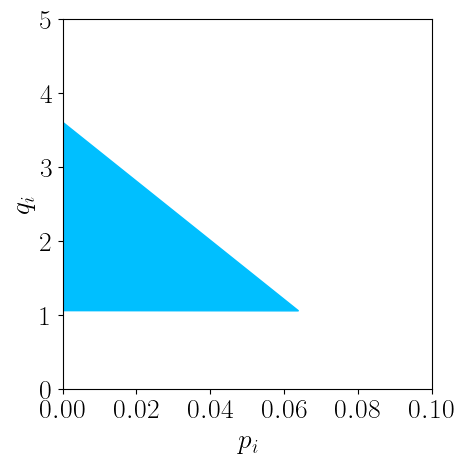

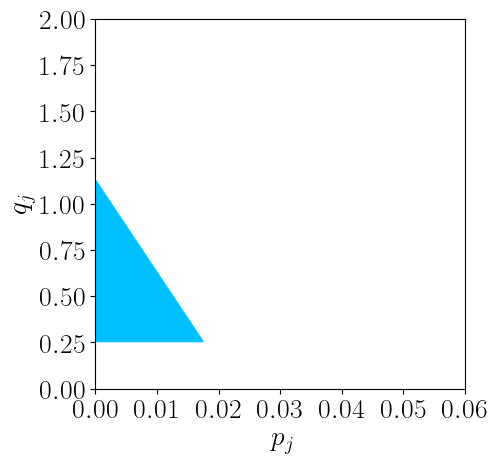

In [151]:
from pacti.iocontract import Var
from pacti.terms.polyhedra import PolyhedralTermList
from pacti.utils.plots import plot_guarantees

# Get bounds on q_i and p_i
contract_i = PolyhedralIoContract(
    assumptions=PolyhedralTermList(),
    guarantees=parameter_contract.g.get_terms_with_vars([Var('p_i'), Var('q_i')]),
    input_vars=[],
    output_vars=[Var('p_i'), Var('q_i')]
    )

ymax1 = 5 # For better visualization
fig1 = plot_guarantees(contract=contract_i,x_var="p_i",y_var="q_i",var_values={},
                    x_lims=[0,0.1],y_lims=[0,ymax1],show=True)
plt.xlabel("$p_i$", fontsize=20)
plt.ylabel("$q_i$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("")
plt.show()
fig1.savefig("regions1.svg", dpi=400, bbox_inches='tight', pad_inches=0.0)

# Get bounds on q_j and p_j
contract_j = PolyhedralIoContract(
    assumptions=PolyhedralTermList(),
    guarantees=parameter_contract.g.get_terms_with_vars([Var('p_j'), Var('q_j')]),
    input_vars=[],
    output_vars=[Var('p_j'), Var('q_j')]
    )

ymax2 = 2  # For better visualization
fig2 = plot_guarantees(contract=contract_j,x_var="p_j",y_var="q_j",var_values={},
                    x_lims=[0,0.06],y_lims=[0,ymax2],show=True)
plt.xlabel("$p_j$", fontsize=20)
plt.ylabel("$q_j$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("")
plt.show()
fig2.savefig("regions2.svg", dpi=400, bbox_inches='tight', pad_inches=0.0)


In [8]:
# Create a range of feasible values
p_i_values = np.linspace(0,contract_i.get_variable_bounds("p_i")[1],100)
q_i_values = np.linspace(contract_i.get_variable_bounds("q_i")[0], ymax1, 100)
feasible_pi_qi_values = []
for i, p_iv in enumerate(p_i_values):
    for j, q_iv in enumerate(q_i_values):
        if contract_i.g.contains_behavior({Var('p_i'): p_iv, Var('q_i'): q_iv}):
            feasible_pi_qi_values.append((p_iv, q_iv))

p_j_values = np.linspace(0,contract_j.get_variable_bounds("p_j")[1],100)
q_j_values = np.linspace(contract_j.get_variable_bounds("q_j")[0], ymax2, 100)
feasible_pj_qj_values = []
for i, p_jv in enumerate(p_j_values):
    for j, q_jv in enumerate(q_j_values):
        if contract_j.g.contains_behavior({Var('p_j'): p_jv, Var('q_j'): q_jv}):
            feasible_pj_qj_values.append((p_jv, q_jv))
# Choose a fixed value of gamma
gamma_s = gamma

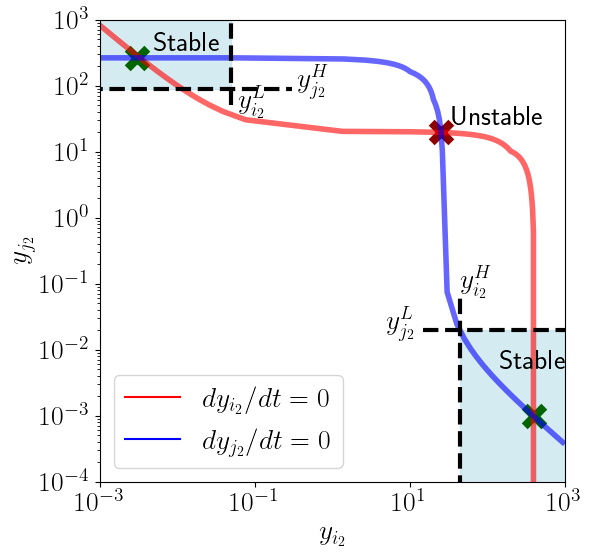

In [188]:
# Plot nullclines for all chosen values of p_i, q_i, p_j, q_j
import matplotlib.lines as mlines
plt.rcParams['text.usetex'] = True
# Initial values
p_i = 0.02
q_i = 1.01
p_j = 0.009
q_j = 0.66

A_i = np.linspace(0, 1000, 100)
A_j = np.linspace(0, 1000, 100)
X1, X2 = np.meshgrid(A_i, A_j)
# Plot all nullclines on this plot
fig, ax = plt.subplots(figsize=(6,6))
U = ( (kappa/delta) * (p_i + b_i*q_i*X1)) / (1 + b_i*X1 + b_ip*X2) - gamma_s * X1
V = ( (kappa/delta) * (p_j + b_j*q_j*X2)) / (1 + b_j*X2 + b_jp*X1) - gamma_s * X2
ax.contour(X1, X2, U, levels=[0], colors="red", alpha=0.6, linewidths=4, )
ax.contour(X1, X2, V, levels=[0], colors="blue", alpha=0.6, linewidths=4, )
# Plot marker lines to show threshold constants
ax.plot([A_i_H, A_i_H], [0, A_j_L+0.05], color='black', ls="--", linewidth=3)
plt.annotate("$y_{i_2}^H$", (A_i_H, A_j_L+0.065), fontsize=20)
ax.plot([A_i_H-30, 1000], [A_j_L, A_j_L], color='black', ls="--", linewidth=3)
plt.annotate("$y_{j_2}^L$", (A_i_H-40, A_j_L), fontsize=20)
ax.fill_between([A_i_H, 1000], 0, A_j_L, color='lightblue', alpha=0.5)
# Other region
ax.plot([A_i_L, A_i_L], [A_j_H-40, 1000], color='black', ls="--", linewidth=3)
plt.annotate("$y_{i_2}^L$", (A_i_L+0.01, A_j_H-45), fontsize=20)
ax.plot([0, A_i_L+0.25], [A_j_H, A_j_H], color='black', ls="--", linewidth=3)
plt.annotate("$y_{j_2}^H$", (A_i_L+0.3, A_j_H), fontsize=20)
ax.fill_between([0, A_i_L], A_j_H, 1000, color='lightblue', alpha=0.5)
plt.scatter([A_i_L-0.047], [A_j_H+170], color='darkgreen', s=200, marker='x', linewidths=6)
plt.annotate("Stable", (A_i_L-0.045, A_j_H+250), fontsize=20)
# The stability "X"'s are marked approximately for visualization
plt.scatter([25], [20], color='darkred', s=200, marker='x', linewidths=6)
plt.annotate("Unstable", (35, 25), fontsize=20)
plt.scatter([A_i_H+350], [1e-3], color='darkgreen', s=200, marker='x', linewidths=6)
plt.annotate("Stable", (A_i_H+100, 5e-3), fontsize=20)
ax.set_xlim(1e-3, 1e3)
ax.set_ylim(1e-4, 1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$y_{i_2}$', fontsize = 20)
ax.set_ylabel('$y_{j_2}$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
# Legend lines
red_line = mlines.Line2D([], [], color='red', label=r'$dy_{i_2}/dt = 0$')
blue_line = mlines.Line2D([], [], color='blue', label=r'$dy_{j_2}/dt = 0$')
plt.legend(handles=[red_line, blue_line], fontsize=20, loc="lower left")
plt.savefig("nullclines_threshold.svg", dpi=400, bbox_inches='tight', pad_inches=0.0)
plt.show()

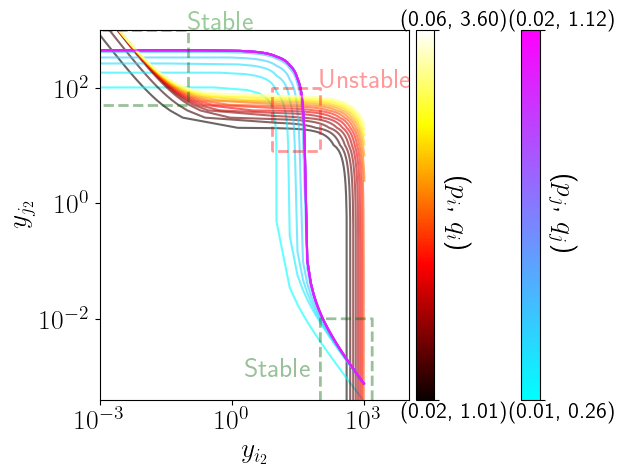

In [193]:
import matplotlib.lines as mlines
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
plt.rcParams['text.usetex'] = True
# Choose random values from feasible_pi_qi_values and feasible_pj_qj_values to check sanity of the analysis
# num_choose = 10
# pi_qi_chosen = np.array(feasible_pi_qi_values)[np.random.choice(len(feasible_pi_qi_values), num_choose)]
# pj_qj_chosen = np.array(feasible_pj_qj_values)[np.random.choice(len(feasible_pj_qj_values), num_choose)]
# Start at p_i = 0.02 and q_i = 1.01, and p_j = 0.009, and q_j = 0.26, increase all parameters gradually in steps for 10 steps

# Choose value pairs step by step from feasible_pi_qi_values and feasible_pj_qj_values
# Choose in increasing steps, not randomly. Start at initial values.
num_choose = 15
pi_qi_chosen = []
pj_qj_chosen = []
p_i = 0.02
q_i = 1.01
p_j = 0.009
q_j = 0.26
for i in range(num_choose):
    pi_qi_chosen.append((p_i, q_i))
    pj_qj_chosen.append((p_j, q_j))
    p_i += 0.02
    q_i += 0.2
    p_j += 0.02
    q_j += 0.2
    # Make sure that the values are within the region in feasible_pi_qi_values and feasible_pj_qj_values
    if (p_i, q_i) not in feasible_pi_qi_values:
        # Find value closest to p_i and q_i in feasible_pi_qi_values
        p_i_closest = min(feasible_pi_qi_values, key=lambda x: abs(x[0] - p_i))
        q_i_closest = min(feasible_pi_qi_values, key=lambda x: abs(x[1] - q_i))
        p_i = p_i_closest[0]
        q_i = q_i_closest[1]
    if (p_j, q_j) not in feasible_pj_qj_values:
        # Find value closest to p_j and q_j in feasible_pj_qj_values
        p_j_closest = min(feasible_pj_qj_values, key=lambda x: abs(x[0] - p_j))
        q_j_closest = min(feasible_pj_qj_values, key=lambda x: abs(x[1] - q_j))
        p_j = p_j_closest[0]
        q_j = q_j_closest[1]


# Choose hot and cold color maps for cmap_u and cmap_v
cmap_u = plt.cm.hot
cmap_v = plt.cm.cool

A_i = np.linspace(0, 1000, 100)
A_j = np.linspace(0, 1000, 100)
X1, X2 = np.meshgrid(A_i, A_j)
# Plot all nullclines on this plot
fig, ax = plt.subplots()
for i in range(num_choose):
    p_i, q_i = pi_qi_chosen[i]
    p_j, q_j = pj_qj_chosen[i]
    U = ( (kappa/delta) * (p_i + b_i*q_i*X1)) / (1 + b_i*X1 + b_ip*X2) - gamma_s * X1
    V = ( (kappa/delta) * (p_j + b_j*q_j*X2)) / (1 + b_j*X2 + b_jp*X1) - gamma_s * X2
    # Plot in gradually changing colors and alphas to show the variations on the same plot
    color_u = cmap_u(i / num_choose)
    color_v = cmap_v(i / num_choose)
    
    # Plot the nullclines using contour for U and V
    ax.contour(X1, X2, U, levels=[0], colors=[color_u], alpha=0.6)
    ax.contour(X1, X2, V, levels=[0], colors=[color_v], alpha=0.6)
    
ax.set_xlim(1e-3, 1e4)
ax.set_ylim(4e-4, 1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$y_{i_2}$', fontsize = 20)
ax.set_ylabel('$y_{j_2}$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# Colorbar for the 'cold' colormap
sm_cold = ScalarMappable(norm=Normalize(vmin=0, vmax=num_choose-1), cmap='cool')
cbar_cold = plt.colorbar(sm_cold, ax=ax, location='right', pad=0.1)
cbar_cold.set_ticks([0, num_choose-1])
plt.annotate(f"({pj_qj_chosen[-1][0]:.2f}, {pj_qj_chosen[-1][1]:.2f})", xy=(1.5, 1.01), xycoords='axes fraction', fontsize=16, ha='center')
plt.annotate(f"({pj_qj_chosen[0][0]:.2f}, {pj_qj_chosen[0][1]:.2f})", xy=(1.5, -0.05), xycoords='axes fraction', fontsize=16, ha='center')
cbar_cold.set_ticklabels([])
cbar_cold.set_label('($p_j$, $q_j$)', rotation=270, fontsize=20, labelpad=20)
sm_hot = ScalarMappable(norm=Normalize(vmin=0, vmax=num_choose-1), cmap='hot')
cbar_hot = plt.colorbar(sm_hot, ax=ax, pad=0.02)
cbar_hot.set_ticks([0, num_choose-1])
# Add text annotation to the top of colorbar with the points from pi_qi_chosen with 2 decimal points
plt.annotate(f"({pi_qi_chosen[-1][0]:.2f}, {pi_qi_chosen[-1][1]:.2f})", xy=(1.15, 1.01), xycoords='axes fraction', fontsize=16, ha='center')
plt.annotate(f"({pi_qi_chosen[0][0]:.2f}, {pi_qi_chosen[0][1]:.2f})", xy=(1.15, -0.05), xycoords='axes fraction', fontsize=16, ha='center')
# Annotate other elements on plot
# Unstable square
points = [(8, 8), (8, 100), (100, 100), (100, 8), (8, 8)]
x, y = zip(*points)
plt.plot(x, y, '--', linewidth=2, markersize=8, color="red", alpha=0.4)
plt.annotate("Unstable", (100, 100), fontsize=20, alpha=0.4, color="red")
# Stable squares
points = [(0, 50), (0, 1000), (0.1, 1000), (0.1, 50), (0, 50)]
x, y = zip(*points)
plt.plot(x, y, '--', linewidth=2, markersize=8, color="darkgreen", alpha=0.4)
plt.annotate("Stable", (0.1, 1000), fontsize=20, alpha=0.4, color="green")

points = [(100, 0), (1500, 0), (100, 0.01), (1500, 0.01), (100, 0)]
x, y = zip(*points)
plt.plot(x, y, '--', linewidth=2, markersize=8, color="darkgreen", alpha=0.4)
plt.annotate("Stable", (2, 0.001), fontsize=20, alpha=0.4, color="darkgreen")
cbar_hot.set_ticklabels([])
cbar_hot.set_label('($p_i$, $q_i$)', rotation=270, fontsize=20, labelpad=20)
plt.savefig("nullclines_choices.pdf", dpi=400, bbox_inches='tight', pad_inches=0.0)
plt.show()